In [1]:
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from pyobsbox import ObsBoxGenerator

# Logging

Set the logging level to debug.

In [2]:
logging.getLogger("pyobsbox").setLevel(logging.DEBUG)

# Metadata

Let's load the metadata.

In [3]:
metadata = Path("../metadata") / "metadata_B1H.h5"

In [4]:
meta_df = pd.read_hdf(metadata)

In [5]:
meta_df.head()

,type,fill,beam,plane,q,file,n_bunches,bunch_index,bunch_number,ts_length
date_time,,,,,,,,,,
2018-05-22 15:10:14,Inst,6711,1,h,7,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6711/...,2556,37,0,65536
2018-05-22 15:10:14,Inst,6711,1,h,7,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6711/...,2556,38,1,65536
2018-05-22 15:10:14,Inst,6711,1,h,7,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6711/...,2556,39,2,65536
2018-05-22 15:10:14,Inst,6711,1,h,7,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6711/...,2556,40,3,65536
2018-05-22 15:10:14,Inst,6711,1,h,7,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6711/...,2556,41,4,65536


# Generator

Create the generator.

In [6]:
generator = ObsBoxGenerator(meta_df, n_bunches=1, sequence_length=2048, shuffle=False)

Dec/04 13:44:12 pyobsbox.generator INFO: Completing 'batch_size'.
Dec/04 13:44:12 pyobsbox.generator INFO: batch_size: 32
Dec/04 13:44:12 pyobsbox.generator INFO: sequence_length: 2048
Dec/04 13:44:12 pyobsbox.generator INFO: n_bunches: 1
Dec/04 13:44:12 pyobsbox.generator INFO: __len__: 427192


# Preprocessing steps

In [7]:
subset = generator._create_subset(0)
subset.head()

,type,fill,beam,plane,q,file,n_bunches,bunch_index,bunch_number,ts_length
date_time,,,,,,,,,,
2018-05-22 15:10:14,Inst,6711,1,h,7,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6711/...,2556,37,0,65536


In [8]:
raw = generator._load(subset)
raw.shape

Dec/04 13:44:12 pyobsbox.generator DEBUG: Opening 1 files.
Dec/04 13:44:12 pyobsbox.generator DEBUG: Opening /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6711/instability_data/06711_Inst_B1H_Q7_20180522_15h10m14s.h5


(65536, 1)

In [9]:
split = generator._split(raw.copy())
split.shape

(32, 2048)

In [10]:
znorm = generator._znorm(split.copy())
znorm.shape

Dec/04 13:44:12 pyobsbox.generator DEBUG: Number of all 0 timeseries: 0


(32, 2048, 1)

The `generator.__getitem__` method does all these steps.

In [11]:
np.allclose(znorm, generator[0])

Dec/04 13:44:12 pyobsbox.generator DEBUG: Started fetching index 0
Dec/04 13:44:12 pyobsbox.generator DEBUG: Opening 1 files.
Dec/04 13:44:12 pyobsbox.generator DEBUG: Opening /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6711/instability_data/06711_Inst_B1H_Q7_20180522_15h10m14s.h5
Dec/04 13:44:12 pyobsbox.generator DEBUG: Number of all 0 timeseries: 0
Dec/04 13:44:12 pyobsbox.generator DEBUG: Finished fetching index 0


True

# Vizualize raw data

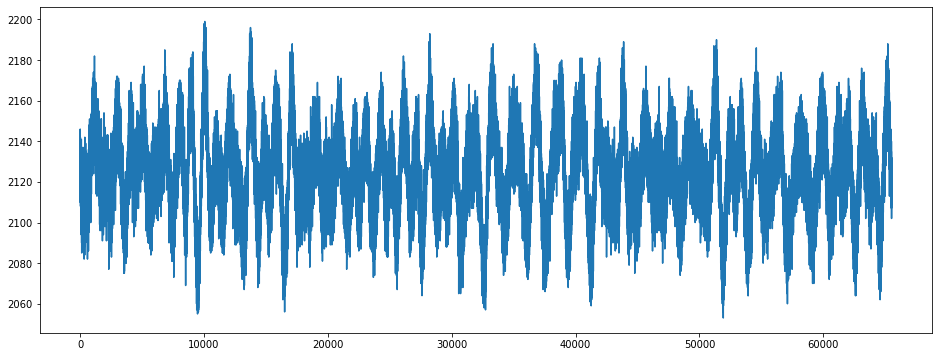

In [12]:
fig = plt.figure(figsize=(16, 6))
plt.plot(raw[:, 0]);

# Vizualize split data

All the splits concatenated, make sure we are not missing anything

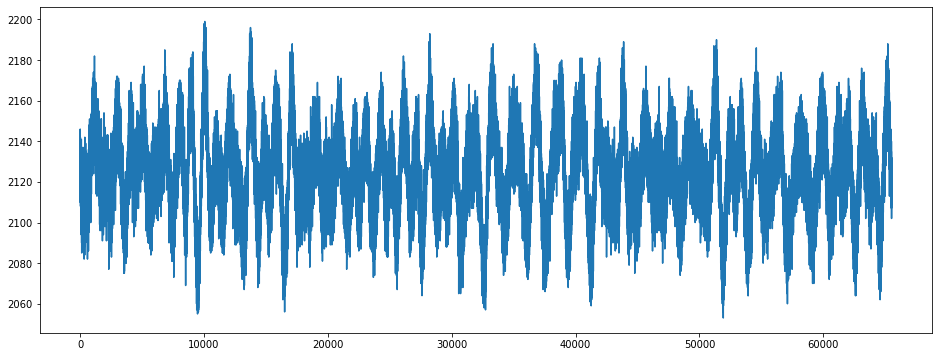

In [13]:
fig = plt.figure(figsize=(16, 6))
plt.plot(np.hstack(split));

The splits.

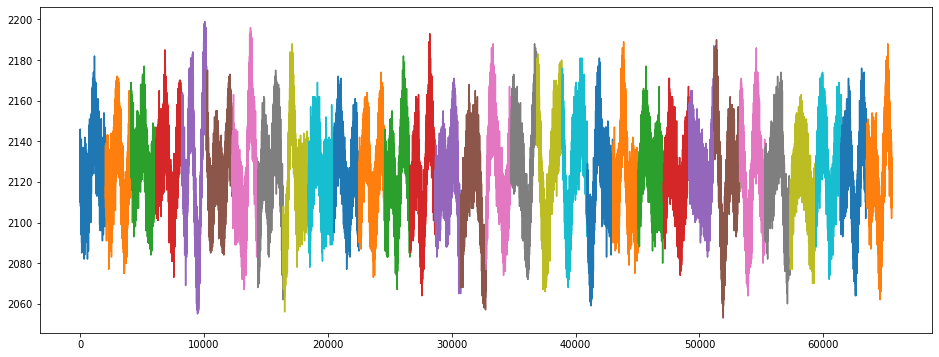

In [14]:
fig = plt.figure(figsize=(16, 6))
for i, data_split in enumerate(split):
    plt.plot(range(i * generator.sequence_length, (i + 1) * generator.sequence_length), data_split)

# Vizualize znorm data

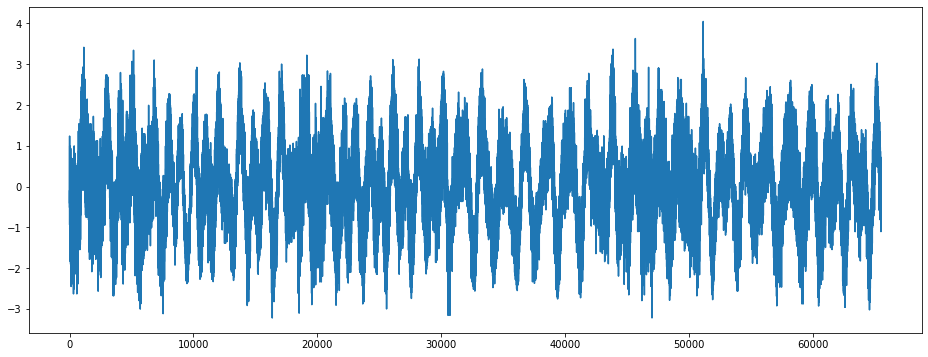

In [15]:
fig = plt.figure(figsize=(16, 6))
plt.plot(np.hstack(znorm.squeeze()));

Each split of the timeseries should have a mean 0 and std 1.

In [16]:
znorm.mean(axis=1)

array([[ 0.00000000e+00],
       [-2.77555756e-17],
       [-2.77555756e-17],
       [ 2.77555756e-17],
       [ 2.77555756e-17],
       [ 2.77555756e-17],
       [ 5.55111512e-17],
       [ 5.55111512e-17],
       [-2.77555756e-17],
       [ 0.00000000e+00],
       [ 5.55111512e-17],
       [-2.77555756e-17],
       [ 2.77555756e-17],
       [ 0.00000000e+00],
       [-2.77555756e-17],
       [ 2.77555756e-17],
       [ 0.00000000e+00],
       [-2.77555756e-17],
       [-2.22044605e-16],
       [ 0.00000000e+00],
       [ 2.77555756e-17],
       [ 0.00000000e+00],
       [-2.77555756e-17],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 4.16333634e-17],
       [ 0.00000000e+00],
       [ 5.55111512e-17],
       [ 0.00000000e+00],
       [ 2.77555756e-17],
       [-1.38777878e-17],
       [-2.77555756e-17]])

In [17]:
znorm.std(axis=1)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])